API Response Code: 200
API Message: 0
              DateTime  Temperature (°C)  Humidity (%)
0  2026-01-28 18:00:00             23.68            45
1  2026-01-28 21:00:00             21.74            48
2  2026-01-29 00:00:00             19.16            48
3  2026-01-29 03:00:00             20.84            40
4  2026-01-29 06:00:00             27.41            35


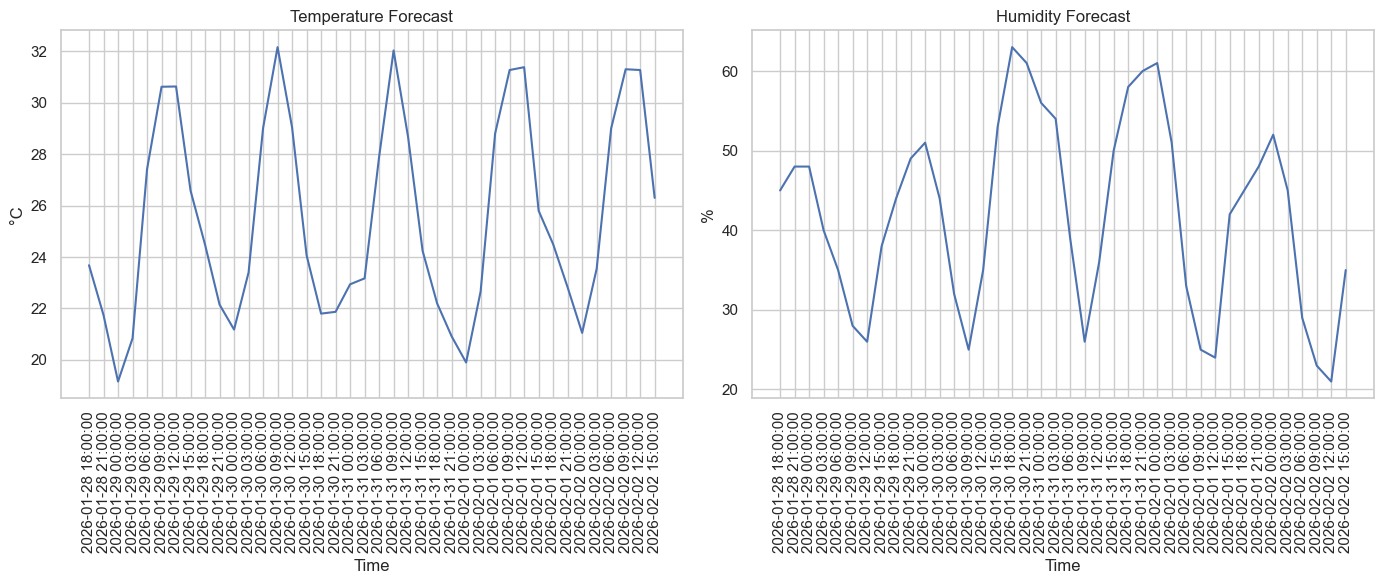

In [3]:
# INTERNSHIP TASK - 1
# API INTEGRATION AND DATA VISUALIZATION

import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

API_KEY = "78a4e5969570d5b5d8dcb9b25c90b8bd" 
CITY = "Pune"
URL = f"https://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(URL)
data = response.json()

print("API Response Code:", data.get("cod"))
print("API Message:", data.get("message"))

if "list" not in data:
    print("Error fetching data. Check API key / city name.")
    print("Full API Response:\n", data)
    exit()
dates, temps, humidity = [], [], []

for item in data['list']:
    dates.append(item['dt_txt'])
    temps.append(item['main']['temp'])
    humidity.append(item['main']['humidity'])

weather_df = pd.DataFrame({
    "DateTime": dates,
    "Temperature (°C)": temps,
    "Humidity (%)": humidity
})

print(weather_df.head())

sns.set(style="whitegrid")
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(weather_df['DateTime'], weather_df['Temperature (°C)'])
plt.xticks(rotation=90)
plt.title("Temperature Forecast")
plt.xlabel("Time")
plt.ylabel("°C")

plt.subplot(1,2,2)
plt.plot(weather_df['DateTime'], weather_df['Humidity (%)'])
plt.xticks(rotation=90)
plt.title("Humidity Forecast")
plt.xlabel("Time")
plt.ylabel("%")

plt.tight_layout()
plt.show()
